In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Path to data folder
directory = '../GATSol/dataset/'

# Load CSVs
df_train = pd.read_pickle(directory + 'eSol_train.pkl')
df_test = pd.read_pickle(directory + 'eSol_test.pkl')

continuous_column = 'solubility'  # Replace with your target column name
binary_column = 'binary_solubility'

# Identify scalar features
scalar_features = [
    col for col in df_train.columns
    if pd.api.types.is_numeric_dtype(df_train[col]) and col != continuous_column and col != binary_column
]

# Extract scalar features and target for regression and classification
X_train = df_train[scalar_features]
y_train_continuous = df_train[continuous_column]
y_train_binary = df_train[binary_column]
X_test = df_test[scalar_features]
y_test_continuous = df_test[continuous_column]
y_test_binary = df_test[binary_column]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
X_train.head()

molecular_weight  aromaticity     gravy  isoelectric_point  length  \
0         7846.4890     0.223881  1.485075           7.824157    67.0   
1        80699.0443     0.091794 -0.042281           9.312345   719.0   
2        26618.2104     0.106838 -0.247009           6.755053   234.0   
3        46587.6743     0.075688 -0.095872           5.506925   436.0   
4        52193.0071     0.085239 -0.186694           5.437809   481.0   

   Hydrophobicity_ARGP820101-G1  Hydrophobicity_ARGP820101-G2  \
0                      0.164179                      0.268657   
1                      0.343533                      0.344924   
2                      0.358974                      0.316239   
3                      0.405963                      0.385321   
4                      0.415800                      0.332640   

   Hydrophobicity_ARGP820101-G3  Hydrophobicity_CASG920101-G1  \
0                      0.567164                      0.283582   
1                      0.311544                      0.524339   
2                      0.324786                      0.525641   
3                      0.208716                      0.506881   
4                      0.251559                      0.530146   

   Hydrophobicity_CASG920101-G2  ...  mean_contacts_per_residue  \
0                      0.432836  ...                   3.358209   
1                      0.354659  ...                   3.534075   
2                      0.329060  ...                   3.547009   
3                      0.399083  ...                   3.642202   
4                      0.345114  ...                   3.586279   

   solvent_exposed_fraction  N_atom_type_proportion  C_atom_type_proportion  \
0                  0.872340                0.145161                0.704301   
1                  0.982405                0.174112                0.643862   
2                  0.980769                0.180459                0.636412   
3                  0.995000                0.181153                0.623666   
4                  1.000000                0.175014                0.627926   

   O_atom_type_proportion  S_atom_type_proportion  \
0                0.145161                0.005376   
1                0.177278                0.004749   
2                0.175654                0.007475   
3                0.190302                0.004880   
4                0.192161                0.004899   

   polar_exposed_residue_proportion  nonpolar_exposed_residue_proportion  \
0                          0.101695                             0.762712   
1                          0.161744                             0.554149   
2                          0.165179                             0.558036   
3                          0.200935                             0.572430   
4                          0.234310                             0.535565   

   positive_exposed_residue_proportion  negative_exposed_residue_proportion  
0                             0.067797                             0.033898  
1                             0.147679                             0.105485  
2                             0.147321                             0.102679  
3                             0.114486                             0.095794  
4                             0.104603                             0.100418  

[5 rows x 67 columns]

In [4]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled_df.shape)
X_train_scaled_df.head()


(2019, 67)


molecular_weight  aromaticity     gravy  isoelectric_point    length  \
0         -1.319825     5.116634  4.855120           0.712178 -1.338477   
1          2.397372     0.468661  0.313400           1.588408  2.346673   
2         -0.362025     0.998023 -0.295374           0.082699 -0.394581   
3          0.656888    -0.098094  0.154044          -0.652186  0.747137   
4          0.942892     0.237995 -0.116025          -0.692881  1.001480   

   Hydrophobicity_ARGP820101-G1  Hydrophobicity_ARGP820101-G2  \
0                     -4.882840                     -1.552149   
1                     -0.844988                      0.240913   
2                     -0.497344                     -0.433464   
3                      0.560535                      1.190676   
4                      0.782001                     -0.047870   

   Hydrophobicity_ARGP820101-G3  Hydrophobicity_CASG920101-G1  \
0                      6.088027                     -5.171033   
1                      0.587177                     -0.121754   
2                      0.872151                     -0.094455   
3                     -1.625646                     -0.487905   
4                     -0.703667                      0.000016   

   Hydrophobicity_CASG920101-G2  ...  mean_contacts_per_residue  \
0                      2.092709  ...                  -1.081553   
1                      0.173917  ...                   0.277000   
2                     -0.454403  ...                   0.376910   
3                      1.264258  ...                   1.112271   
4                     -0.060356  ...                   0.680268   

   solvent_exposed_fraction  N_atom_type_proportion  C_atom_type_proportion  \
0                 -2.669630               -3.970462                6.264260   
1                  0.396178               -0.101950                0.916193   
2                  0.350622                0.746207                0.256970   
3                  0.747016                0.838893               -0.870924   
4                  0.886290                0.018547               -0.493950   

   O_atom_type_proportion  S_atom_type_proportion  \
0               -4.504737                0.033367   
1               -0.989096               -0.255787   
2               -1.166814                0.999747   
3                0.436635               -0.195440   
4                0.640156               -0.186341   

   polar_exposed_residue_proportion  nonpolar_exposed_residue_proportion  \
0                         -2.294576                             3.959105   
1                         -0.840569                             0.449496   
2                         -0.757406                             0.514899   
3                          0.108377                             0.757118   
4                          0.916508                             0.136768   

   positive_exposed_residue_proportion  negative_exposed_residue_proportion  
0                            -1.893561                            -2.649554  
1                             0.495280                            -0.368379  
2                             0.484577                            -0.457816  
3                            -0.497346                            -0.677186  
4                            -0.792905                            -0.529838  

[5 rows x 67 columns]

In [3]:
X_train_scaled_df.columns

Index(['molecular_weight', 'aromaticity', 'gravy', 'isoelectric_point',
       'length', 'Hydrophobicity_ARGP820101-G1',
       'Hydrophobicity_ARGP820101-G2', 'Hydrophobicity_ARGP820101-G3',
       'Hydrophobicity_CASG920101-G1', 'Hydrophobicity_CASG920101-G2',
       'Hydrophobicity_CASG920101-G3', 'Hydrophobicity_ENGD860101-G1',
       'Hydrophobicity_ENGD860101-G2', 'Hydrophobicity_ENGD860101-G3',
       'Hydrophobicity_FASG890101-G1', 'Hydrophobicity_FASG890101-G2',
       'Hydrophobicity_FASG890101-G3', 'Hydrophobicity_PONP930101-G1',
       'Hydrophobicity_PONP930101-G2', 'Hydrophobicity_PONP930101-G3',
       'Hydrophobicity_PRAM900101-G1', 'Hydrophobicity_PRAM900101-G2',
       'Hydrophobicity_PRAM900101-G3', 'Hydrophobicity_ZIMJ680101-G1',
       'Hydrophobicity_ZIMJ680101-G2', 'Hydrophobicity_ZIMJ680101-G3',
       'Normalized van der Waals Volume-G1',
       'Normalized van der Waals Volume-G2',
       'Normalized van der Waals Volume-G3', 'Polarity-G1', 'Polarity-G2',
    

In [4]:
# ---- Linear Regression ----
print("\n=== Linear Regression ===")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_continuous)

# Get coefficients and sort by importance
linear_coefficients = linear_model.coef_
linear_coef_df = pd.DataFrame({
    'Feature': scalar_features,
    'Coefficient': linear_coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print sorted coefficients
print("\nSorted Coefficients (Linear Regression):")
print(linear_coef_df)


=== Linear Regression ===

Sorted Coefficients (Linear Regression):
                               Feature  Coefficient
45                           num_atoms     3.754350
46                          total_mass    -2.707929
0                     molecular_weight    -1.541898
61              O_atom_type_proportion     0.725713
59              N_atom_type_proportion    -0.611208
..                                 ...          ...
15        Hydrophobicity_FASG890101-G2    -0.004357
55                       b_factors_min     0.003076
50                 bounding_box_volume     0.001675
26  Normalized van der Waals Volume-G1    -0.000721
48                          num_chains     0.000000

[67 rows x 2 columns]


In [5]:
# Evaluate the model
linear_r_squared = linear_model.score(X_test_scaled, y_test_continuous)
print(f"\nR^2 Score on Test Set: {linear_r_squared:.4f}")



R^2 Score on Test Set: 0.4291


In [6]:
df_train.columns

Index(['gene', 'solubility', 'sequence', 'embedding', 'binary_solubility',
       'molecular_weight', 'aromaticity', 'gravy', 'isoelectric_point',
       'length', 'aac', 'Hydrophobicity_ARGP820101-G1',
       'Hydrophobicity_ARGP820101-G2', 'Hydrophobicity_ARGP820101-G3',
       'Hydrophobicity_CASG920101-G1', 'Hydrophobicity_CASG920101-G2',
       'Hydrophobicity_CASG920101-G3', 'Hydrophobicity_ENGD860101-G1',
       'Hydrophobicity_ENGD860101-G2', 'Hydrophobicity_ENGD860101-G3',
       'Hydrophobicity_FASG890101-G1', 'Hydrophobicity_FASG890101-G2',
       'Hydrophobicity_FASG890101-G3', 'Hydrophobicity_PONP930101-G1',
       'Hydrophobicity_PONP930101-G2', 'Hydrophobicity_PONP930101-G3',
       'Hydrophobicity_PRAM900101-G1', 'Hydrophobicity_PRAM900101-G2',
       'Hydrophobicity_PRAM900101-G3', 'Hydrophobicity_ZIMJ680101-G1',
       'Hydrophobicity_ZIMJ680101-G2', 'Hydrophobicity_ZIMJ680101-G3',
       'Normalized van der Waals Volume-G1',
       'Normalized van der Waals Volume-G2

In [7]:
test_embeddings = df_test[["gene", "embedding", "blosum62_embedding"]]
train_embeddings = df_train[["gene", "embedding", "blosum62_embedding"]]
train_embeddings

gene                                          embedding  \
0     aaeX  [[0.025740903, -0.06068451, 0.04562243, -0.098...   
1      aas  [[-0.037975986, -0.046647176, -0.014576814, 0....   
2      aat  [[0.037574537, -0.042643685, 0.05279441, -0.02...   
3     abgA  [[-0.00765643, -0.13189432, 0.014674729, -0.01...   
4     abgB  [[0.0036755833, -0.15647556, -0.01813248, 0.04...   
...    ...                                                ...   
2014  zapA  [[-0.017177405, -0.01794975, 0.029380163, -0.0...   
2015  zntA  [[-0.021385752, -0.07058593, 0.024256472, 0.03...   
2016  znuA  [[-0.0033216071, -0.061825093, 0.004684513, 0....   
2017   zur  [[0.035278082, -0.063037135, -0.0353482, 0.028...   
2018   zwf  [[0.047771648, -0.011822389, 0.0050821127, 0.0...   

                                     blosum62_embedding  
0     [5, 4, 4, 6, 7, 4, 4, 4, 4, 6, 6, 4, 4, 6, 7, ...  
1     [5, 4, 6, 4, 6, 6, 5, 6, 4, 9, 5, 4, 4, 7, 5, ...  
2     [5, 5, 4, 4, 5, 4, 4, 5, 8, 4, 4, 4, 6, 7, 4, ...  
3     [5, 5, 4, 4, 6, 5, 6, 4, 6, 4, 4, 4, 7, 5, 4, ...  
4     [5, 5, 5, 4, 7, 5, 6, 4, 6, 6, 4, 4, 5, 4, 6, ...  
...                                                 ...  
2014  [5, 4, 4, 5, 7, 4, 6, 4, 5, 4, 6, 6, 5, 4, 4, ...  
2015  [5, 4, 5, 7, 6, 6, 8, 6, 5, 5, 4, 7, 5, 6, 4, ...  
2016  [5, 4, 8, 5, 5, 5, 4, 4, 6, 4, 4, 4, 4, 4, 4, ...  
2017  [5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, ...  
2018  [5, 4, 4, 5, 5, 5, 4, 5, 4, 9, 6, 4, 4, 4, 6, ...  

[2019 rows x 3 columns]

In [8]:
import pandas as pd
import numpy as np

def process_file_with_blosum_fixed(input_file, output_file, blosum_matrix, embedding_size=50):
    """
    Adds fixed-length BLOSUM embeddings to a DataFrame from a CSV or pickle file.

    Parameters:
        input_file (str): Path to the input CSV or pickle file.
        output_file (str): Path to save the output file.
        blosum_matrix (dict): BLOSUM matrix to calculate embeddings.
        embedding_size (int): Fixed size for the embeddings (default = 50).

    Returns:
        pd.DataFrame: DataFrame with fixed-length BLOSUM embeddings added.
    """
    # Load the input file
    if input_file.endswith('.csv'):
        df = pd.read_csv(input_file)
    elif input_file.endswith('.pkl'):
        df = pd.read_pickle(input_file)
    else:
        raise ValueError("Unsupported file format. Only .csv and .pkl are supported.")

    # Ensure the file has a 'sequence' column
    if 'sequence' not in df.columns:
        raise ValueError("The input file must contain a 'sequence' column.")

    # Define a function to calculate fixed-length BLOSUM embeddings
    def calculate_blosum62_embedding(sequence):
        embedding = [blosum_matrix.get((aa, aa), 0) for aa in sequence]  # Diagonal BLOSUM scores
        if len(embedding) < embedding_size:
            # Zero-pad to fixed size
            embedding += [0] * (embedding_size - len(embedding))
        elif len(embedding) > embedding_size:
            # Truncate to fixed size
            embedding = embedding[:embedding_size]
        return embedding

    # Add fixed-length BLOSUM embedding column
    df['blosum62_embedding'] = df['sequence'].apply(calculate_blosum62_embedding)

    # Save the updated DataFrame
    if output_file.endswith('.csv'):
        df.to_csv(output_file, index=False)
    elif output_file.endswith('.pkl'):
        df.to_pickle(output_file)
    else:
        raise ValueError("Unsupported output file format. Only .csv and .pkl are supported.")

    return df

In [9]:
# Example Usage
if __name__ == "__main__":
    # Define the BLOSUM62 matrix
    blosum62 = {
        ('A', 'A'): 4, ('R', 'R'): 5, ('N', 'N'): 6, ('D', 'D'): 6, ('C', 'C'): 9,
        ('Q', 'Q'): 5, ('E', 'E'): 5, ('G', 'G'): 6, ('H', 'H'): 8, ('I', 'I'): 4,
        ('L', 'L'): 4, ('K', 'K'): 5, ('M', 'M'): 5, ('F', 'F'): 6, ('P', 'P'): 7,
        ('S', 'S'): 4, ('T', 'T'): 5, ('W', 'W'): 11, ('Y', 'Y'): 7, ('V', 'V'): 4
    }

    input_path = "../GATSol/dataset/eSol_train_blosum.pkl"  # Replace with your input file path
    output_path = "../GATSol/dataset/eSol_train_blosum.pkl"  # Replace with your output file path

    updated_df = process_file_with_blosum_fixed(input_path, output_path, blosum62, embedding_size=50)
    print("Updated file saved to:", output_path)

Updated file saved to: ../GATSol/dataset/eSol_train_blosum.pkl


In [10]:
import pandas as pd

# Load the updated DataFrame
output_path = "../GATSol/dataset/eSol_train_blosum.pkl"
updated_df = pd.read_pickle(output_path)

# Inspect the first few rows
updated_df.head()


gene  solubility                                           sequence  \
0  aaeX        0.34  MSLFPVIVVFGLSFPPIFFELLLSLAIFWLVRRVLVPTGIYDFVWH...   
1   aas        0.07  MLFSFFRNLCRVLYRVRVTGDTQALKGERVLITPNHVSFIDGILLG...   
2   aat        0.08  MRLVQLSRHSIAFPSPEGALREPNGLLALGGDLSPARLLMAYQRGI...   
3  abgA        0.31  MESLNQFVNSLAPKLSHWRRDFHHYAESGWVEFRTATLVAEELHQL...   
4  abgB        0.49  MQEIYRFIDDAIEADRQRYTDIADQIWDHPETRFEEFWSAEHLASA...   

                                           embedding  binary_solubility  \
0  [[0.025740903, -0.06068451, 0.04562243, -0.098...                  0   
1  [[-0.037975986, -0.046647176, -0.014576814, 0....                  0   
2  [[0.037574537, -0.042643685, 0.05279441, -0.02...                  0   
3  [[-0.00765643, -0.13189432, 0.014674729, -0.01...                  0   
4  [[0.0036755833, -0.15647556, -0.01813248, 0.04...                  0   

   molecular_weight  aromaticity     gravy  isoelectric_point  length  ...  \
0         7846.4890     0.223881  1.485075           7.824157    67.0  ...   
1        80699.0443     0.091794 -0.042281           9.312345   719.0  ...   
2        26618.2104     0.106838 -0.247009           6.755053   234.0  ...   
3        46587.6743     0.075688 -0.095872           5.506925   436.0  ...   
4        52193.0071     0.085239 -0.186694           5.437809   481.0  ...   

  mean_contacts_per_residue  solvent_exposed_fraction  N_atom_type_proportion  \
0                  3.358209                  0.872340                0.145161   
1                  3.534075                  0.982405                0.174112   
2                  3.547009                  0.980769                0.180459   
3                  3.642202                  0.995000                0.181153   
4                  3.586279                  1.000000                0.175014   

   C_atom_type_proportion  O_atom_type_proportion  S_atom_type_proportion  \
0                0.704301                0.145161                0.005376   
1                0.643862                0.177278                0.004749   
2                0.636412                0.175654                0.007475   
3                0.623666                0.190302                0.004880   
4                0.627926                0.192161                0.004899   

   polar_exposed_residue_proportion  nonpolar_exposed_residue_proportion  \
0                          0.101695                             0.762712   
1                          0.161744                             0.554149   
2                          0.165179                             0.558036   
3                          0.200935                             0.572430   
4                          0.234310                             0.535565   

   positive_exposed_residue_proportion  negative_exposed_residue_proportion  
0                             0.067797                             0.033898  
1                             0.147679                             0.105485  
2                             0.147321                             0.102679  
3                             0.114486                             0.095794  
4                             0.104603                             0.100418  

[5 rows x 76 columns]

In [11]:
# Check the embedding dimensions
updated_df['blosum62_embedding'] = updated_df['blosum62_embedding'].apply(lambda x: len(x))
print("Unique embedding dimensions:", updated_df['blosum62_embedding'].unique())


Unique embedding dimensions: [50]


In [12]:
# Print the first few embeddings
print(updated_df['blosum62_embedding'].iloc[0])  # First row
print(updated_df['blosum62_embedding'].iloc[1])  # Second row


50
50


In [13]:
import numpy as np

# Flatten ESM embeddings
train_embeddings['flattened_embedding'] = train_embeddings['embedding'].apply(
    lambda x: np.array(x).flatten()
)
test_embeddings['flattened_embedding'] = test_embeddings['embedding'].apply(
    lambda x: np.array(x).flatten()
)

# Validate dimensions
print("Train ESM dimensions:", train_embeddings['flattened_embedding'].apply(len).unique())
print("Test ESM dimensions:", test_embeddings['flattened_embedding'].apply(len).unique())


Train ESM dimensions: [1280]
Test ESM dimensions: [1280]


/tmp/ipykernel_302777/577380073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_embeddings['flattened_embedding'] = train_embeddings['embedding'].apply(
/tmp/ipykernel_302777/577380073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_embeddings['flattened_embedding'] = test_embeddings['embedding'].apply(


In [14]:
import numpy as np

# Flatten ESM embeddings
train_embeddings['flattened_embedding'] = train_embeddings['embedding'].apply(
    lambda x: np.array(x).flatten()
)
test_embeddings['flattened_embedding'] = test_embeddings['embedding'].apply(
    lambda x: np.array(x).flatten()
)

# Validate dimensions
print("Train ESM dimensions:", train_embeddings['flattened_embedding'].apply(len).unique())
print("Test ESM dimensions:", test_embeddings['flattened_embedding'].apply(len).unique())


Train ESM dimensions: [1280]
Test ESM dimensions: [1280]


/tmp/ipykernel_302777/577380073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_embeddings['flattened_embedding'] = train_embeddings['embedding'].apply(
/tmp/ipykernel_302777/577380073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_embeddings['flattened_embedding'] = test_embeddings['embedding'].apply(


In [15]:
# Convert flattened embeddings to NumPy arrays
X_train_embeddings = np.array(train_embeddings['flattened_embedding'].tolist())
X_test_embeddings = np.array(test_embeddings['flattened_embedding'].tolist())

# Check shapes
print("Train embeddings shape:", X_train_embeddings.shape)  # Should be (n_samples, 1280)
print("Test embeddings shape:", X_test_embeddings.shape)    # Should be (n_samples, 1280)


Train embeddings shape: (2019, 1280)
Test embeddings shape: (660, 1280)


In [16]:
# Combine scalar features and embeddings
X_train_combined = np.hstack([X_train_scaled, X_train_embeddings])
X_test_combined = np.hstack([X_test_scaled, X_test_embeddings])

# Validate shapes
print("Combined train shape:", X_train_combined.shape)
print("Combined test shape:", X_test_combined.shape)


Combined train shape: (2019, 1347)
Combined test shape: (660, 1347)


In [17]:
import sklearn
import xgboost

print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


Scikit-learn version: 1.6.0
XGBoost version: 2.1.3


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Train the XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Learning rate
    max_depth=5,            # Maximum depth
    random_state=42         # For reproducibility
)
xgb_model.fit(X_train_combined, y_train_continuous)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train_combined)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test_combined)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train_continuous, y_train_pred)
train_r2 = r2_score(y_train_continuous, y_train_pred)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test_continuous, y_test_pred)
test_r2 = r2_score(y_test_continuous, y_test_pred)

# Print the results
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Training R^2 Score: {train_r2:.4f}")
print(f"Test Mean Squared Error: {test_mse:.4f}")
print(f"Test R^2 Score: {test_r2:.4f}")


Training Mean Squared Error: 0.0027
Training R^2 Score: 0.9741
Test Mean Squared Error: 0.0526
Test R^2 Score: 0.4914


In [21]:
# Extract feature importance
feature_importance = xgb_model.feature_importances_

# Create feature names (scalar features + embedding dimensions)
feature_names = scalar_features + [f"ESM_{i}" for i in range(X_train_embeddings.shape[1])]

# Create a DataFrame for interpretability
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print("\nTop 10 Features by Importance:")
print(importance_df.head(10))



Top 10 Features by Importance:
                                  Feature  Importance
66    negative_exposed_residue_proportion    0.035025
46                             total_mass    0.019019
7            Hydrophobicity_ARGP820101-G3    0.017117
45                              num_atoms    0.009862
474                               ESM_407    0.009846
875                               ESM_808    0.008583
61                 O_atom_type_proportion    0.008459
952                               ESM_885    0.008356
4                                  length    0.008339
1046                              ESM_979    0.007924


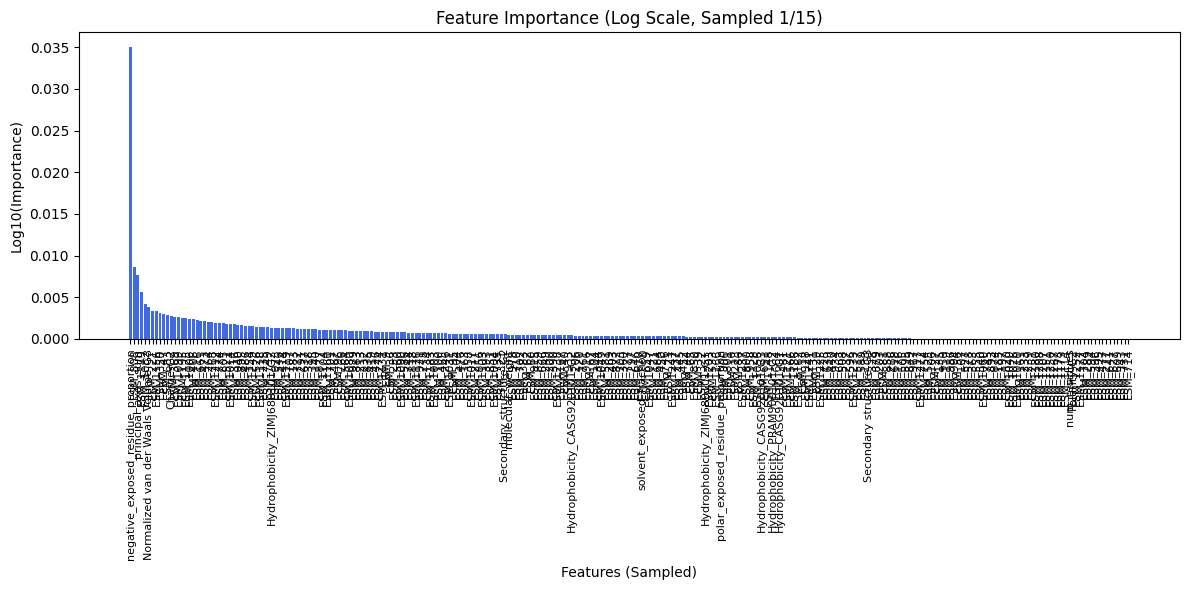

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sort features by importance
importance_df_sorted = importance_df.sort_values(by="Importance", ascending=False)

# Sample every 15th feature to reduce clutter
sampled_df = importance_df_sorted.iloc[::5]

# Log-transform the importance values for the y-axis
log_importance = (sampled_df["Importance"] + 1e-6)  # Add small constant to avoid log(0)

# Plot the sampled features
plt.figure(figsize=(12, 6))
plt.bar(range(len(sampled_df)), log_importance, color="royalblue")
plt.xticks(range(len(sampled_df)), sampled_df["Feature"], rotation=90, fontsize=8)
plt.ylabel("Log10(Importance)")
plt.xlabel("Features (Sampled)")
plt.title("Feature Importance (Log Scale, Sampled 1/15)")
plt.tight_layout()
plt.show()


In [24]:
sequence_features = [
    'molecular_weight', 'aromaticity', 'gravy', 'isoelectric_point',
    'length', 'Hydrophobicity_ARGP820101-G1', 'Hydrophobicity_ARGP820101-G2',
    'Hydrophobicity_ARGP820101-G3', 'Hydrophobicity_CASG920101-G1',
    'Hydrophobicity_CASG920101-G2', 'Hydrophobicity_CASG920101-G3',
    'Hydrophobicity_ENGD860101-G1', 'Hydrophobicity_ENGD860101-G2',
    'Hydrophobicity_ENGD860101-G3', 'Hydrophobicity_FASG890101-G1',
    'Hydrophobicity_FASG890101-G2', 'Hydrophobicity_FASG890101-G3',
    'Hydrophobicity_PONP930101-G1', 'Hydrophobicity_PONP930101-G2',
    'Hydrophobicity_PONP930101-G3', 'Hydrophobicity_PRAM900101-G1',
    'Hydrophobicity_PRAM900101-G2', 'Hydrophobicity_PRAM900101-G3',
    'Hydrophobicity_ZIMJ680101-G1', 'Hydrophobicity_ZIMJ680101-G2',
    'Hydrophobicity_ZIMJ680101-G3', 'Normalized van der Waals Volume-G1',
    'Normalized van der Waals Volume-G2', 'Normalized van der Waals Volume-G3',
    'Polarity-G1', 'Polarity-G2', 'Polarity-G3', 'Polarizability-G1',
    'Polarizability-G2', 'Polarizability-G3', 'Charge-G1', 'Charge-G2',
    'Charge-G3', 'Secondary structure-G1', 'Secondary structure-G2',
    'Secondary structure-G3', 'Solvent accessibility-G1',
    'Solvent accessibility-G2', 'Solvent accessibility-G3', 'blosum_score'
]

structure_features = [
    'num_atoms', 'total_mass', 'num_residues', 'num_chains', 'radius_of_gyration',
    'bounding_box_volume', 'principal_axes_sum', 'aspect_ratio', 'b_factors_mean',
    'b_factors_variance', 'b_factors_min', 'b_factors_max', 'mean_contacts_per_residue',
    'solvent_exposed_fraction', 'N_atom_type_proportion', 'C_atom_type_proportion',
    'O_atom_type_proportion', 'S_atom_type_proportion', 'polar_exposed_residue_proportion',
    'nonpolar_exposed_residue_proportion', 'positive_exposed_residue_proportion',
    'negative_exposed_residue_proportion'
]

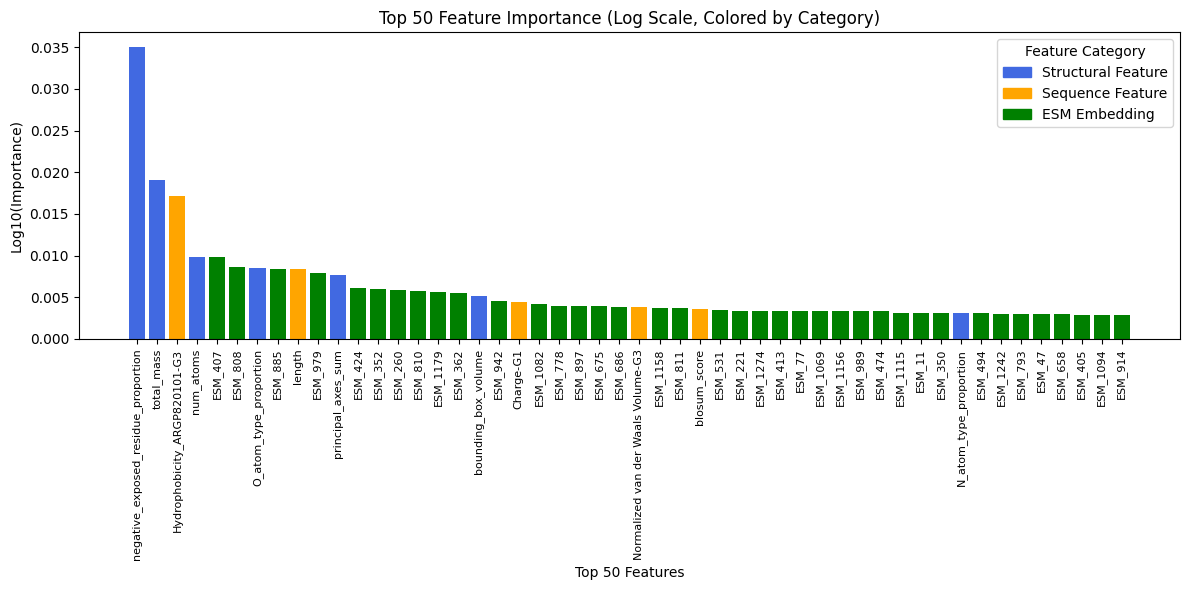

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sort features by importance and select the top 50
importance_df_sorted = importance_df.sort_values(by="Importance", ascending=False).head(50)

# Log-transform importance values
log_importance = (importance_df_sorted["Importance"] + 1e-6)

# Classify features into categories
def classify_feature(feature):
    if feature in sequence_features:
        return "Sequence Feature"
    elif feature in structure_features:
        return "Structural Feature"
    elif feature.startswith("ESM_"):
        return "ESM Embedding"
    else:
        return "Uncategorized"

# Apply classification and assign colors
importance_df_sorted["Category"] = importance_df_sorted["Feature"].apply(classify_feature)
color_map = {
    "Structural Feature": "royalblue",
    "Sequence Feature": "orange",
    "ESM Embedding": "green"
}
colors = importance_df_sorted["Category"].map(color_map)

# Plot the top 50 features
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance_df_sorted)), log_importance, color=colors)
plt.xticks(range(len(importance_df_sorted)), importance_df_sorted["Feature"], rotation=90, fontsize=8)
plt.ylabel("Log10(Importance)")
plt.xlabel("Top 50 Features")
plt.title("Top 50 Feature Importance (Log Scale, Colored by Category)")
plt.tight_layout()

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[label]) for label in color_map]
plt.legend(handles, color_map.keys(), title="Feature Category", loc="upper right")

plt.show()


In [27]:
# Calculate total importance per feature category
total_importance = {
    "Sequence Feature": importance_df[importance_df["Feature"].isin(sequence_features)]["Importance"].sum(),
    "Structural Feature": importance_df[importance_df["Feature"].isin(structure_features)]["Importance"].sum(),
    "ESM Embedding": importance_df[importance_df["Feature"].str.startswith("ESM_")]["Importance"].sum(),
    "Uncategorized": importance_df[~importance_df["Feature"].isin(sequence_features + structure_features) &
                                   ~importance_df["Feature"].str.startswith("ESM_")]["Importance"].sum()
}

# Display the results
print("Total Importance by Feature Category:")
for category, importance in total_importance.items():
    print(f"{category}: {importance:.6f}")


Total Importance by Feature Category:
Sequence Feature: 0.058356
Structural Feature: 0.094374
ESM Embedding: 0.847270
Uncategorized: 0.000000


In [29]:
# Print the tree in text format
trees = xgb_model.get_booster().get_dump(with_stats=True)
print("Tree 0:")
print(trees[0])  # Show the first tree


Tree 0:
0:[f66<0.615585506] yes=1,no=2,missing=2,gain=30.7633858,cover=2019
	1:[f7<-0.38835448] yes=3,no=4,missing=4,gain=13.582799,cover=1551
		3:[f4<-0.377624869] yes=7,no=8,missing=8,gain=4.36398315,cover=473
			7:[f474<-0.0550225601] yes=15,no=16,missing=16,gain=2.90654421,cover=212
				15:[f238<-0.00259521278] yes=31,no=32,missing=32,gain=0.87684536,cover=91
					31:leaf=-0.000238236462,cover=8
					32:leaf=0.0343795195,cover=83
				16:[f491<-0.0456723087] yes=33,no=34,missing=34,gain=1.79109406,cover=121
					33:leaf=-0.0162972976,cover=24
					34:leaf=0.0137385447,cover=97
			8:[f419<0.0548039265] yes=17,no=18,missing=18,gain=2.7630372,cover=261
				17:[f1136<-0.0577970333] yes=35,no=36,missing=36,gain=1.83491564,cover=233
					35:leaf=0.0226021204,cover=21
					36:leaf=-0.00775267417,cover=212
				18:[f1040<0.0228467267] yes=37,no=38,missing=38,gain=0.523743391,cover=28
					37:leaf=0.0331827067,cover=24
					38:leaf=-0.00471441355,cover=4
		4:[f4<-0.4850142] yes=9,no=10,missin

In [30]:
def cumulative_importance(importance_df, top_x_values):
    """
    Calculate and print the cumulative importance for the top X features.

    Parameters:
    - importance_df: DataFrame with 'Feature' and 'Importance' columns.
    - top_x_values: List of integers indicating the top X features to consider.
    """
    # Sort features by importance in descending order
    importance_df_sorted = importance_df.sort_values(by="Importance", ascending=False)
    
    # Calculate cumulative importance
    importance_df_sorted["Cumulative Importance"] = importance_df_sorted["Importance"].cumsum()
    
    # Print cumulative importance for top X features
    total_importance = importance_df_sorted["Importance"].sum()  # Total importance for normalization
    print("Cumulative Importance Captured by Top Features:\n")
    for x in top_x_values:
        if x > len(importance_df_sorted):
            print(f"Top {x} features: Only {len(importance_df_sorted)} features available.")
        else:
            cumulative = importance_df_sorted["Cumulative Importance"].iloc[x-1]
            percentage = (cumulative / total_importance) * 100
            print(f"Top {x} features capture: {percentage:.2f}% of total importance.")

# Example usage
top_x_list = [10, 20, 50, 100]  # Customize these values
cumulative_importance(importance_df, top_x_list)


Cumulative Importance Captured by Top Features:

Top 10 features capture: 13.25% of total importance.
Top 20 features capture: 18.92% of total importance.
Top 50 features capture: 29.04% of total importance.
Top 100 features capture: 41.50% of total importance.


In [20]:
import optuna
print("Optuna version:", optuna.__version__)


Optuna version: 4.1.0


/home/nathan/miniconda3/envs/PH245_Project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
import optuna
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import warnings

# Suppress XGBoost warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Define a DataFrame to record results for each trial
results = []

# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 80, 150),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.15),
        'max_depth': trial.suggest_int('max_depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'random_state': 42,
    }
    
    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    r2_scores = []
    fold_metrics = []  # To store per-fold metrics
    
    for train_index, val_index in kf.split(X_train_combined):
        X_train_fold, X_val_fold = X_train_combined[train_index], X_train_combined[val_index]
        y_train_fold, y_val_fold = y_train_continuous[train_index], y_train_continuous[val_index]
        
        # Convert to DMatrix
        dtrain_fold = xgb.DMatrix(X_train_fold, label=y_train_fold)
        dval_fold = xgb.DMatrix(X_val_fold, label=y_val_fold)
        
        # Train the model
        model = xgb.train(
            params,
            dtrain_fold,
            num_boost_round=300,
            evals=[(dval_fold, 'eval')],
            early_stopping_rounds=10,
            verbose_eval=False
        )
        
        # Predict on validation fold
        y_pred_fold = model.predict(dval_fold)
        r2_fold = r2_score(y_val_fold, y_pred_fold)
        mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
        
        # Calculate classification metrics for fold (binary classification)
        y_pred_fold_class = (y_pred_fold >= 0.5).astype(int)
        y_val_class = (y_val_fold >= 0.5).astype(int)
        
        fold_metrics.append({
            'r2_fold': r2_fold,
            'mse_fold': mse_fold,
            'accuracy_fold': accuracy_score(y_val_class, y_pred_fold_class),
            'precision_fold': precision_score(y_val_class, y_pred_fold_class),
            'recall_fold': recall_score(y_val_class, y_pred_fold_class),
            'f1_fold': f1_score(y_val_class, y_pred_fold_class),
            'auc_fold': roc_auc_score(y_val_class, y_pred_fold),
        })
        
        r2_scores.append(r2_fold)
    
    # Record the results for this trial
    mean_r2 = np.mean(r2_scores)
    mean_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
    
    # Predict on the test set with the trained model
    dtrain = xgb.DMatrix(X_train_combined, label=y_train_continuous)
    dtest = xgb.DMatrix(X_test_combined, label=y_test_continuous)
    final_model = xgb.train(params, dtrain, num_boost_round=300)
    y_pred_test = final_model.predict(dtest)
    
    mse_test = mean_squared_error(y_test_continuous, y_pred_test)
    r2_test = r2_score(y_test_continuous, y_pred_test)
    
    # Test classification metrics
    y_pred_test_class = (y_pred_test >= 0.5).astype(int)
    y_test_class = (y_test_continuous >= 0.5).astype(int)
    
    test_metrics = {
        'mse_test': mse_test,
        'r2_test': r2_test,
        'accuracy_test': accuracy_score(y_test_class, y_pred_test_class),
        'precision_test': precision_score(y_test_class, y_pred_test_class),
        'recall_test': recall_score(y_test_class, y_pred_test_class),
        'f1_test': f1_score(y_test_class, y_pred_test_class),
        'auc_test': roc_auc_score(y_test_class, y_pred_test),
    }
    
    results.append({
        **params,
        **mean_metrics,
        **test_metrics,
        'mean_r2': mean_r2,
    })
    
    # Return the mean R^2 score
    return mean_r2

# Run the Optuna optimization
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=100)  # Increase n_trials for more thorough search

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


[I 2024-12-14 15:52:28,646] A new study created in memory with name: no-name-183e0a69-cf6f-4ef0-8bff-f2327d3e3ce3
[I 2024-12-14 15:52:42,828] Trial 0 finished with value: 0.3997551183527473 and parameters: {'n_estimators': 91, 'learning_rate': 0.1312119772729844, 'max_depth': 5, 'subsample': 0.8727097963653698, 'colsample_bytree': 0.8395066598583473, 'min_child_weight': 5, 'gamma': 0.06086303346447657}. Best is trial 0 with value: 0.3997551183527473.
[I 2024-12-14 15:52:58,148] Trial 1 finished with value: 0.3932497330051568 and parameters: {'n_estimators': 83, 'learning_rate': 0.14271313339699818, 'max_depth': 5, 'subsample': 0.8716264136013014, 'colsample_bytree': 0.950441095723499, 'min_child_weight': 4, 'gamma': 0.018300683520540574}. Best is trial 0 with value: 0.3997551183527473.
[I 2024-12-14 15:53:12,374] Trial 2 finished with value: 0.41712748886433976 and parameters: {'n_estimators': 144, 'learning_rate': 0.08989267370545995, 'max_depth': 4, 'subsample': 0.9580194152223132, '

In [36]:
# Print a summary
results_df.tail()

objective  n_estimators  learning_rate  max_depth  subsample  \
95  reg:squarederror           136       0.050083          4   0.820636   
96  reg:squarederror           141       0.052579          4   0.834840   
97  reg:squarederror           143       0.052546          4   0.848222   
98  reg:squarederror           142       0.056196          4   0.833905   
99  reg:squarederror           142       0.062360          4   0.831813   

    colsample_bytree  min_child_weight     gamma  random_state   r2_fold  ...  \
95          0.896585                 2  0.134945            42  0.428774  ...   
96          0.867134                 2  0.116000            42  0.437228  ...   
97          0.867636                 2  0.160522            42  0.434578  ...   
98          0.866377                 2  0.161807            42  0.436922  ...   
99          0.876993                 2  0.161737            42  0.433088  ...   

     f1_fold  auc_fold  mse_test   r2_test  accuracy_test  precision_test  \
95  0.726959  0.836916  0.049746  0.519077       0.804545        0.802158   
96  0.732927  0.840525  0.049442  0.522018       0.804545        0.804348   
97  0.740632  0.838362  0.049624  0.520262       0.801515        0.796429   
98  0.730834  0.840906  0.049077  0.525551       0.810606        0.807143   
99  0.738528  0.838522  0.047981  0.536145       0.796970        0.790036   

    recall_test   f1_test  auc_test   mean_r2  
95     0.750842  0.775652  0.884863  0.428774  
96     0.747475  0.774869  0.890642  0.437228  
97     0.750842  0.772964  0.890521  0.434578  
98     0.760943  0.783362  0.889705  0.436922  
99     0.747475  0.768166  0.894538  0.433088  

[5 rows x 24 columns]

In [47]:
# Find the trial with the highest test R²
best_trial = results_df.loc[results_df['r2_test'].idxmax()]

# Display the best trial information
print("Best Trial Based on Test R²:")
print(best_trial)

# Optionally, display the best trial as a DataFrame for better visualization
best_trial_df = best_trial.to_frame().T 
best_trial_df

Best Trial Based on Test R²:
objective           reg:squarederror
n_estimators                     142
learning_rate                0.06236
max_depth                          4
subsample                   0.831813
colsample_bytree            0.876993
min_child_weight                   2
gamma                       0.161737
random_state                      42
r2_fold                     0.433088
mse_fold                    0.058971
accuracy_fold               0.766716
precision_fold              0.760293
recall_fold                 0.719353
f1_fold                     0.738528
auc_fold                    0.838522
mse_test                    0.047981
r2_test                     0.536145
accuracy_test                0.79697
precision_test              0.790036
recall_test                 0.747475
f1_test                     0.768166
auc_test                    0.894538
mean_r2                     0.433088
Name: 99, dtype: object


objective n_estimators learning_rate max_depth subsample  \
99  reg:squarederror          142       0.06236         4  0.831813   

   colsample_bytree min_child_weight     gamma random_state   r2_fold  ...  \
99         0.876993                2  0.161737           42  0.433088  ...   

     f1_fold  auc_fold  mse_test   r2_test accuracy_test precision_test  \
99  0.738528  0.838522  0.047981  0.536145       0.79697       0.790036   

   recall_test   f1_test  auc_test   mean_r2  
99    0.747475  0.768166  0.894538  0.433088  

[1 rows x 24 columns]

In [91]:
results_df.to_csv("optuna_results.csv", index=False)

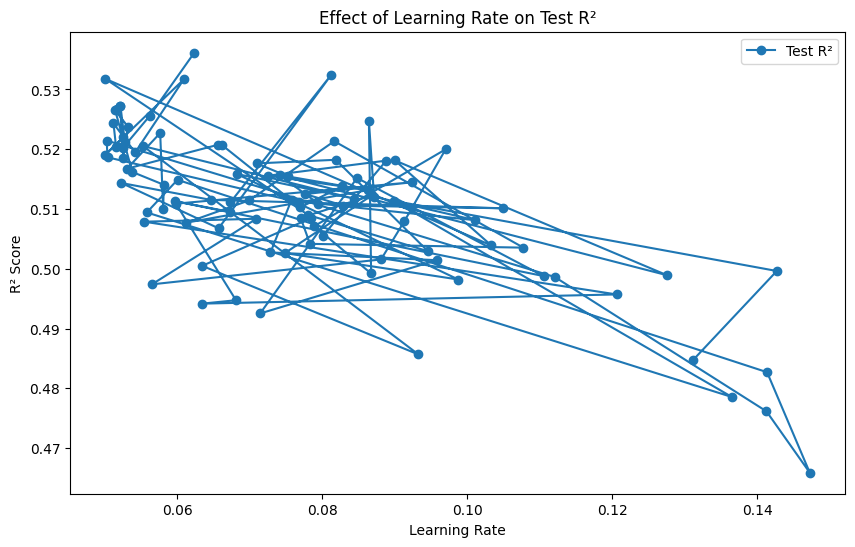

In [38]:

# Plotting for summary graphs (like Fig. 4 in the paper)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['learning_rate'], results_df['r2_test'], 'o-', label='Test R²')
plt.xlabel('Learning Rate')
plt.ylabel('R² Score')
plt.title('Effect of Learning Rate on Test R²')
plt.legend()
plt.show()

In [81]:
import optuna
from optuna.visualization import plot_optimization_history

# Generate an optimization history plot
fig = plot_optimization_history(study)

# Adjust the figure size, font size, and legend position
fig.update_layout(
    width=600,  # Width in pixels
    height=600,  # Height in pixels
    yaxis_title="R²",  # Update the y-axis title to reflect R²
    font=dict(
        size=16  # Set font size for all text
    ),
    legend=dict(
        orientation="h",  # Make the legend horizontal
        yanchor="bottom",  # Align the legend to the bottom
        y=-0.3,  # Position the legend below the plot
        xanchor="center",  # Center the legend horizontally
        x=0.5  # Align the legend in the center of the plot
    )
)

# Show the plot
fig.show()



In [41]:
from optuna.visualization import plot_param_importances

# Generate a hyperparameter importance plot
fig = plot_param_importances(study)

# Adjust the figure size to a 10x6 ratio
fig.update_layout(
    width=1000,  # Width in pixels
    height=600   # Height in pixels
)
fig.show()


In [90]:
from optuna.visualization import plot_parallel_coordinate

# Generate a parallel coordinate plot
fig = plot_parallel_coordinate(study)

# Define custom color range by setting cmin, cmax, and cmid
fig.update_traces(
    line=dict(
        color=fig.data[0].line.color,  # Keep the same objective values for coloring
        colorscale="Blues",  # Use the "Blues" colorscale
        cmin=0.42,           # Set the minimum value for the color range
        cmid=0.433,          # Set the midpoint for the color range
        cmax=0.44,           # Set the maximum value for the color range
        colorbar=dict(title="R²")  # Update the color bar title directly
    )
)

# Update the dimensions to rename "Objective Value" to "R²"
for dimension in fig.data[0].dimensions:
    if dimension.label == "Objective Value":  # Find the "Objective Value" dimension
        dimension.label = "R²"               # Rename it to "R²"

# Update the layout to increase text size and adjust margins
fig.update_layout(
    width=1200,  # Width of the figure
    height=600,  # Height of the figure
    font=dict(
        size=16  # Increase the font size for all text
    ),
    margin=dict(
        l=100,  # Left margin
        r=100,  # Right margin
        t=50,   # Top margin
        b=100   # Bottom margin to prevent overlap with x-axis text
    )
)

# Show the updated plot
fig.show()


In [69]:
from optuna.visualization import plot_slice

# Generate a slice plot
fig = plot_slice(study)
fig.show()


In [44]:
from optuna.visualization import plot_contour

# Generate a contour plot
fig = plot_contour(study)
fig.show()


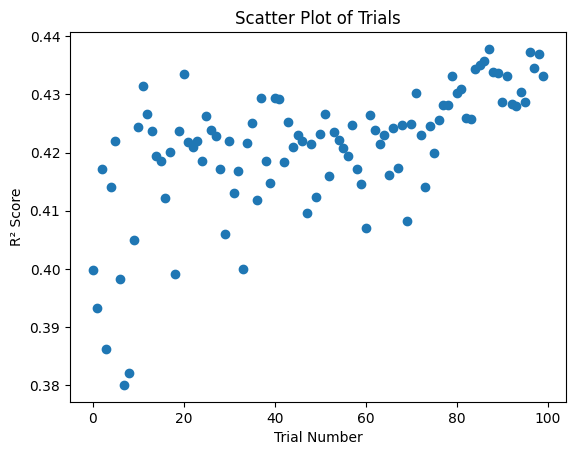

In [45]:
import matplotlib.pyplot as plt

# Scatter plot of trials
trials_df = study.trials_dataframe()
plt.scatter(trials_df['number'], trials_df['value'])
plt.xlabel("Trial Number")
plt.ylabel("R² Score")
plt.title("Scatter Plot of Trials")
plt.show()


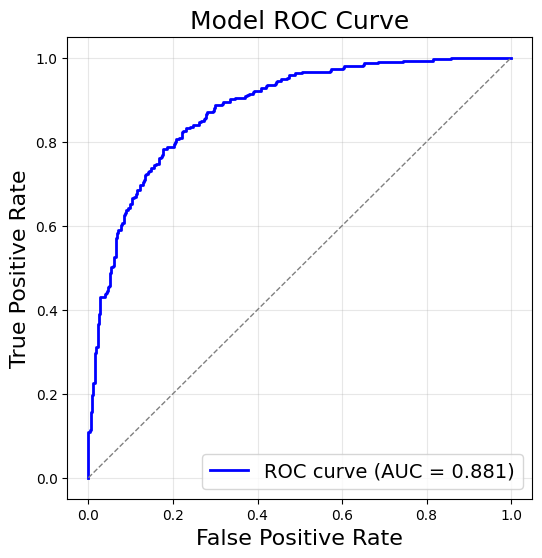

AUC: 0.881


In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # For classification
import numpy as np

# Define the optimal parameters for the model
optimal_params = {
    "n_estimators": 142,
    "learning_rate": 0.06236,
    "max_depth": 4,
    "subsample": 0.831813,
    "colsample_bytree": 0.876993,
    "min_child_weight": 2,
    "gamma": 0.161737,
    "random_state": 42
}

# Train the XGBoost classifier on the binary_solubility column
xgb_model = XGBClassifier(**optimal_params)
xgb_model.fit(X_train_combined, y_train_binary)  # Assuming y_train_binary is the binary label for solubility

# Predict probabilities on the test set
y_test_prob = xgb_model.predict_proba(X_test_combined)[:, 1]  # Probability of the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_prob)  # y_test_binary is the binary test labels
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("Model ROC Curve", fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Print the AUC
print(f"AUC: {roc_auc:.3f}")


In [89]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add the ROC curve
fig.add_trace(go.Scatter(
    x=fpr,  # False Positive Rate
    y=tpr,  # True Positive Rate
    mode='lines',
    name=f"ROC curve (AUC = {roc_auc:.3f})",
    line=dict(color='blue', width=2)
))

# Add the diagonal line
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name="Random Guess",
    line=dict(color='gray', dash='dash', width=1)
))

# Customize the layout
fig.update_layout(
    title=dict(text="Model ROC Curve", font=dict(size=18)),
    xaxis=dict(title="False Positive Rate", titlefont=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title="True Positive Rate", titlefont=dict(size=16), tickfont=dict(size=14)),
    legend=dict(x=0.6, y=0.1, font=dict(size=14), bgcolor="rgba(0,0,0,0)"),
    width=600,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50),
    template="simple_white"
)

# Show the plot
fig.show()

# Print the AUC
print(f"AUC: {roc_auc:.3f}")


AUC: 0.881


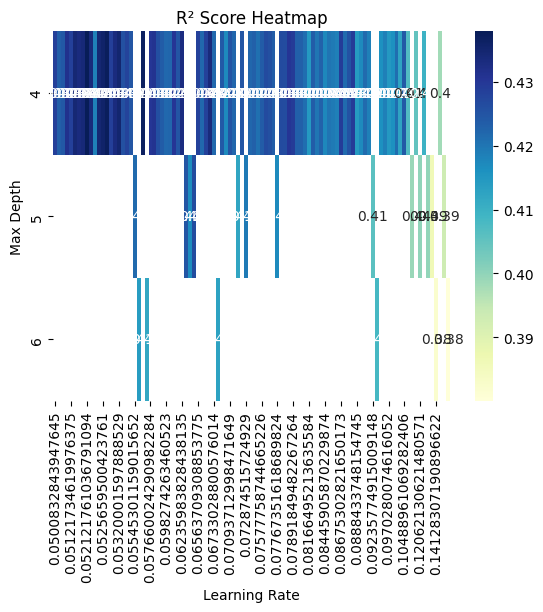

In [46]:
import seaborn as sns
import pandas as pd

# Convert trials to DataFrame
trials_df = study.trials_dataframe()

# Example: Heatmap for `max_depth` and `learning_rate`
heatmap_data = trials_df.pivot_table(index='params_max_depth', columns='params_learning_rate', values='value')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("R² Score Heatmap")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()
